In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
# random_state = 0
# random.seed(random_state)
# np.random.seed(random_state)
# torch.random.manual_seed(random_state)

In [2]:
p0 = 2307.91
c1 = p0 * 0.03
k1 = 2700
c2 = p0 * 0.03
k2 = 1800

w1 = 0.08
w2 = 0.92

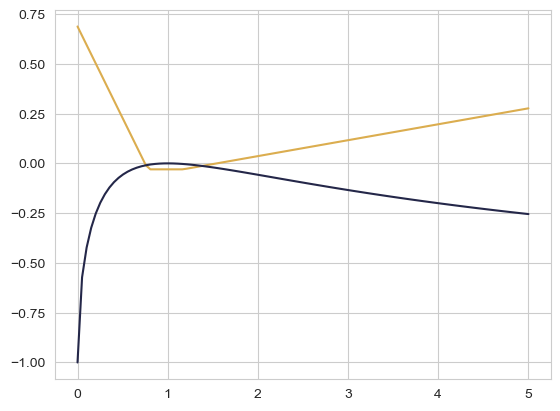

In [3]:
x = np.linspace(0, 5, 100)
y = 2 * np.sqrt(x) / (x + 1) - 1

y1 = (np.maximum(0, x * p0 - k1) - c1) / p0
y2 = (np.maximum(0, k2 - x * p0) - c2) / p0
plt.plot(x, y1 * w1 + y2 * w2, color='#DBAD4F')
plt.plot(x, y, color='#242749')

In [4]:
df_instrument = pd.read_csv('./data/deribit_instruments.csv', index_col=[0])
df_instrument[['currency', 'expire_date', 'strike_price', 'option_type']] = df_instrument.instrument_name.str.split('-', expand=True)
df_instrument

,mid_price,estimated_delivery_price,volume_usd,quote_currency,creation_timestamp,base_currency,interest_rate,volume,underlying_index,underlying_price,...,ask_price,bid_price,instrument_name,last,low,high,currency,expire_date,strike_price,option_type
0,0.02975,2307.91,274.52,ETH,1703393241971,ETH,0.0,4.0,ETH-29MAR24,2388.450000,...,0.0310,0.0285,ETH-29MAR24-1800-P,0.0300,0.0300,0.0300,ETH,29MAR24,1800,P
1,0.02775,2307.91,35078.64,ETH,1703393241971,ETH,0.0,518.0,SYN.ETH-12JAN24,2328.810000,...,0.0280,0.0275,ETH-12JAN24-2200-P,0.0275,0.0275,0.0300,ETH,12JAN24,2200,P
2,0.00105,2307.91,25.10,ETH,1703393241971,ETH,0.0,16.0,SYN.ETH-26DEC23,2310.529823,...,0.0012,0.0009,ETH-26DEC23-2500-C,0.0007,0.0004,0.0007,ETH,26DEC23,2500,C
3,0.08325,2307.91,4632.38,ETH,1703393241971,ETH,0.0,24.0,SYN.ETH-23FEB24,2362.832222,...,0.0840,0.0825,ETH-23FEB24-2300-P,0.0845,0.0815,0.0845,ETH,23FEB24,2300,P
4,0.00040,2307.91,293.38,ETH,1703393241972,ETH,0.0,160.0,SYN.ETH-25DEC23,2309.236431,...,0.0006,0.0002,ETH-25DEC23-2225-P,0.0004,0.0004,0.0025,ETH,25DEC23,2225,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,0.00015,2307.91,116.33,ETH,1703393241982,ETH,0.0,123.0,SYN.ETH-25DEC23,2309.236431,...,0.0002,0.0001,ETH-25DEC23-2175-P,0.0003,0.0003,0.0006,ETH,25DEC23,2175,P
714,0.00090,2307.91,0.00,ETH,1703393241982,ETH,0.0,0.0,ETH-28JUN24,2442.140000,...,0.0015,0.0003,ETH-28JUN24-500-P,0.0015,NaN,NaN,ETH,28JUN24,500,P
715,0.04650,2307.91,0.00,ETH,1703393241982,ETH,0.0,0.0,SYN.ETH-26DEC23,2310.529823,...,0.0630,0.0300,ETH-26DEC23-2425-P,NaN,NaN,NaN,ETH,26DEC23,2425,P
716,NaN,2307.91,0.00,ETH,1703393241982,ETH,0.0,0.0,SYN.ETH-23FEB24,2362.832222,...,NaN,NaN,ETH-23FEB24-1300-C,NaN,NaN,NaN,ETH,23FEB24,1300,C


In [5]:
p0 = df_instrument.estimated_delivery_price.mean()
x = np.linspace(0, 5, 100)
x_list = []

for i in df_instrument.index:
    c = float(df_instrument.iloc[i]['last'] * p0)
    k = float(df_instrument.iloc[i]['strike_price'])
    if df_instrument.iloc[i]['option_type'] == 'C':
        yl = (np.maximum(0, x * p0 - k) - c) / p0
        # ys = (c - np.maximum(0, x * p0 - k)) / p0
    else:
        yl = (np.maximum(0, k - x * p0) - c) / p0
        # ys = (c - np.maximum(0, k - x * p0)) / p0
    x_list.append(yl)
    # x_list.append(ys)

In [6]:
x = np.linspace(0, 5, 100)
y = 2 * np.sqrt(x) / (x + 1) - 1
print(-y)

[1.00000000e+00 5.72142395e-01 4.22674029e-01 3.23935127e-01
 2.52148052e-01 1.97590777e-01 1.55074320e-01 1.21429095e-01
 9.45535124e-02 7.29751891e-02 5.56209880e-02 4.16851525e-02
 3.05484846e-02 2.17261983e-02 1.48328810e-02 9.55816439e-03
 5.64936486e-03 2.89881404e-03 1.13443031e-03 2.12585036e-04
 1.26260235e-05 4.32619531e-04 1.38600205e-03 2.79892091e-03
 4.60810276e-03 6.75913119e-03 9.20504448e-03 1.19051863e-02
 1.48242576e-02 1.79315304e-02 2.12001922e-02 2.46067958e-02
 2.81307971e-02 3.17541634e-02 3.54610419e-02 3.92374758e-02
 4.30711630e-02 4.69512477e-02 5.08681425e-02 5.48133733e-02
 5.87794462e-02 6.27597313e-02 6.67483619e-02 7.07401466e-02
 7.47304921e-02 7.87153360e-02 8.26910877e-02 8.66545759e-02
 9.06030033e-02 9.45339056e-02 9.84451162e-02 1.02334734e-01
 1.06201095e-01 1.10042748e-01 1.13858433e-01 1.17647059e-01
 1.21407688e-01 1.25139520e-01 1.28841877e-01 1.32514191e-01
 1.36155993e-01 1.39766904e-01 1.43346622e-01 1.46894919e-01
 1.50411629e-01 1.538966

In [7]:
mat_X = np.array(x_list)
mat_X = mat_X[~np.isnan(mat_X).any(axis=1)]
mat_X = np.unique(mat_X, axis=0)
mat_X

array([[-0.872     , -0.872     , -0.85764839, ...,  3.94033141,
         3.99083646,  4.04134151],
       [-0.79      , -0.79      , -0.79      , ...,  3.93567292,
         3.98617797,  4.03668302],
       [-0.784     , -0.784     , -0.784     , ...,  3.89834367,
         3.94884872,  3.99935377],
       ...,
       [ 1.1014623 ,  1.05095725,  1.0004522 , ..., -1.065     ,
        -1.065     , -1.065     ],
       [ 1.17125476,  1.12074971,  1.07024466, ..., -1.4285    ,
        -1.4285    , -1.4285    ],
       [ 1.22519345,  1.1746884 ,  1.12418334, ..., -2.0245    ,
        -2.0245    , -2.0245    ]])

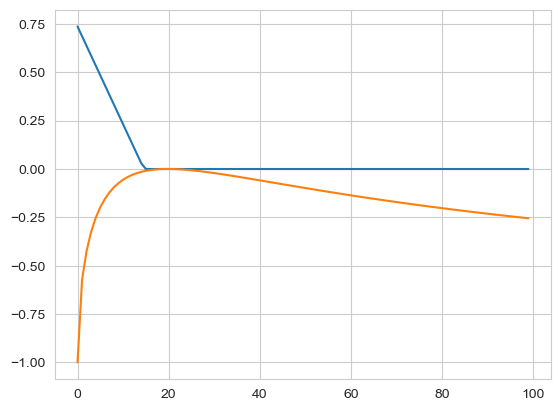

In [8]:
plt.plot(mat_X[350])
plt.plot(y)

In [9]:
np.array(-y)

array([1.00000000e+00, 5.72142395e-01, 4.22674029e-01, 3.23935127e-01,
       2.52148052e-01, 1.97590777e-01, 1.55074320e-01, 1.21429095e-01,
       9.45535124e-02, 7.29751891e-02, 5.56209880e-02, 4.16851525e-02,
       3.05484846e-02, 2.17261983e-02, 1.48328810e-02, 9.55816439e-03,
       5.64936486e-03, 2.89881404e-03, 1.13443031e-03, 2.12585036e-04,
       1.26260235e-05, 4.32619531e-04, 1.38600205e-03, 2.79892091e-03,
       4.60810276e-03, 6.75913119e-03, 9.20504448e-03, 1.19051863e-02,
       1.48242576e-02, 1.79315304e-02, 2.12001922e-02, 2.46067958e-02,
       2.81307971e-02, 3.17541634e-02, 3.54610419e-02, 3.92374758e-02,
       4.30711630e-02, 4.69512477e-02, 5.08681425e-02, 5.48133733e-02,
       5.87794462e-02, 6.27597313e-02, 6.67483619e-02, 7.07401466e-02,
       7.47304921e-02, 7.87153360e-02, 8.26910877e-02, 8.66545759e-02,
       9.06030033e-02, 9.45339056e-02, 9.84451162e-02, 1.02334734e-01,
       1.06201095e-01, 1.10042748e-01, 1.13858433e-01, 1.17647059e-01,
      

In [8]:
w = np.matmul(np.matmul(np.linalg.inv(np.matmul(mat_X, mat_X.transpose())), mat_X), np.array(-y))

In [9]:
X = torch.from_numpy(mat_X.transpose())
Y = torch.from_numpy(-y)
X = X.float()
Y = Y.float()

In [14]:
# Define a linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)  # One output for regression

    def forward(self, x):
        return self.linear(x)

# Instantiate the model
input_size = X.shape[1]
model = LinearRegressionModel(input_size)

# Define the loss function (Mean Squared Error)
criterion = nn.MSELoss()

# Define the optimizer (Stochastic Gradient Descent)
optimizer = optim.SGD(model.parameters(), lr=0.0001)

In [15]:
for epoch in range(500):
    epoch_loss = 0
    optimizer.zero_grad()
    for i in range(50):
        predictions = model(X[i])
        
        # print(X[i])
        # print(predictions)
        mse_loss = criterion(predictions, Y[i])
        l2_reg = sum(p.pow(2.0).sum() for p in model.parameters()) * 0.01
        loss = mse_loss + l2_reg
        # print(loss)
        
        epoch_loss += loss.item()
        # # Backward pass and optimization
        # optimizer.zero_grad()
        loss.backward()
    
    optimizer.step()
    
    print(epoch_loss)

/Users/chengjiaxiang/opt/anaconda3/envs/survml/lib/python3.8/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


11.919665841385722
1.2077703373506665
1.0864755185320973
1.060258321929723
1.03935127845034
1.0216325360815972
1.0061581355985254
0.9922937981318682
0.9796096307691187
0.967813044320792
0.9567041026894003
0.9461447428911924
0.9360395942348987
0.9263208855409175
0.9169405081775039
0.9078632693272084
0.8990627680905163
0.8905186981428415
0.882215132471174
0.8741383587475866
0.8662777210120112
0.858623139327392
0.851165994303301
0.8438985839020461
0.8368139639496803
0.829904877115041
0.8231651159003377
0.8165890227537602
0.8101703701540828
0.8039043059106916
0.7977852488402277
0.7918083493132144
0.7859688741154969
0.7802623121533543
0.7746841895859689
0.7692302437499166
0.7638965940568596
0.7586791056673974
0.753574303118512
0.7485784683376551
0.7436881593894213
0.7388999508693814
0.7342109240125865
0.7296176897361875
0.7251174240373075
0.7207072372548282
0.7163844599854201
0.712146314792335
0.7079904242418706
0.7039142469875515
0.6999152989592403
0.6959915538318455
0.6921406553592533
0.6

In [16]:
w = model.linear.weight.data.numpy()
w

array([[ 0.03359781,  0.00556464, -0.02036429, -0.00353371,  0.02983522,
         0.04062473, -0.0265177 ,  0.02377067,  0.02896861,  0.02187634,
         0.02101985, -0.00378512,  0.04409488,  0.01780474, -0.01042995,
        -0.0283905 , -0.00841501, -0.03424374,  0.04750529,  0.04571966,
         0.02443757,  0.0149272 , -0.02584163,  0.02883087,  0.00808491,
         0.01255376,  0.02344972, -0.01617704,  0.0206243 , -0.01677474,
         0.02651159,  0.01204531, -0.00907949, -0.02329306,  0.01907434,
        -0.03028265,  0.01376398,  0.03584677, -0.03591003,  0.00873667,
        -0.03021492, -0.00811667,  0.03295801, -0.02764265,  0.00910856,
         0.03212643, -0.0402858 , -0.01002354, -0.01470873,  0.01310274,
        -0.02111192,  0.03142703,  0.00306499, -0.02450497,  0.03114577,
        -0.01850175,  0.01334375,  0.01556634, -0.03831568,  0.00034857,
        -0.02554804,  0.01365387, -0.02186411, -0.00074284,  0.0246483 ,
        -0.00477251,  0.03193129,  0.0042215 , -0.0

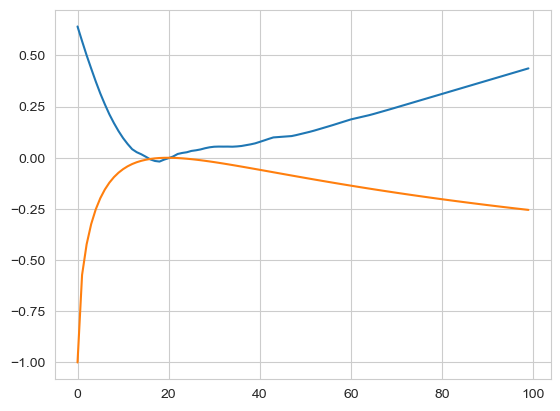

In [17]:
plt.plot(np.matmul(mat_X.transpose(), w.transpose()))
plt.plot(y)

In [19]:
pd.DataFrame(w).to_csv('weights.csv')

In [10]:
w = pd.read_csv('weights.csv', index_col=[0])
w

,0,1,2,3,4,5,6,7,8,9,...,484,485,486,487,488,489,490,491,492,493
0,0.033598,0.005565,-0.020364,-0.003534,0.029835,0.040625,-0.026518,0.023771,0.028969,0.021876,...,0.041585,0.040004,0.017876,0.018665,0.025042,-0.035598,0.023789,0.004304,0.024987,0.010221


In [12]:
import matplotlib as mpl
mpl.style.use('classic')

/var/folders/s0/gcg7k5ws6hxfgnzww6_ryn0c0000gn/T/ipykernel_6750/1145895814.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals_y])
/var/folders/s0/gcg7k5ws6hxfgnzww6_ryn0c0000gn/T/ipykernel_6750/1145895814.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals_x])


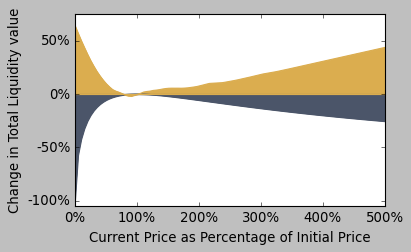

In [22]:
f = plt.figure(figsize=(5,3))
# Setting the background color of the plot 
ax = plt.axes()
# ax.set_facecolor("#F0EEDC")

x = np.linspace(0, 5, 100)
y = 2 * np.sqrt(x) / (x + 1) - 1
h = np.matmul(mat_X.transpose(), np.array(w).transpose())

plt.plot(x, y, color='#4B5569')
plt.axhline(color='#4B5569')

plt.plot(x, h, color='#DBAD4F')
plt.axhline(color='#DBAD4F')

ax.set_ylim(-1.05, 0.75)
plt.xlim(0, 5)

ax.fill_between(x, 0, y, color='#4B5569')
ax.fill_between(x, 0, h.transpose().tolist()[0], color='#DBAD4F')

plt.rcParams.update({'font.sans-serif':'DejaVu Sans'})

vals_y = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals_y])
vals_x = ax.get_xticks()
ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals_x])

plt.ylabel('Change in Total Liquidity value')
plt.xlabel('Current Price as Percentage of Initial Price')
plt.savefig('./img/IL_hedge.png', dpi=500, bbox_inches='tight', transparent=True)

/var/folders/s0/gcg7k5ws6hxfgnzww6_ryn0c0000gn/T/ipykernel_6750/3910872471.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals_y])
/var/folders/s0/gcg7k5ws6hxfgnzww6_ryn0c0000gn/T/ipykernel_6750/3910872471.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals_x])


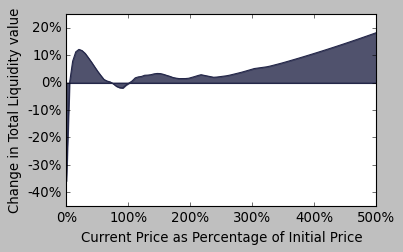

In [24]:
f = plt.figure(figsize=(5,3))
# Setting the background color of the plot 
ax = plt.axes()
# ax.set_facecolor("#F0EEDC")

x = np.linspace(0, 5, 100)
y = 2 * np.sqrt(x) / (x + 1) - 1
h = np.matmul(mat_X.transpose(), np.array(w).transpose())

plt.plot(x, h.transpose().tolist()[0] + y, color='#242749')
plt.axhline(color='#242749')

ax.set_ylim(-0.45, 0.25)
plt.xlim(0, 5)

ax.fill_between(x, 0, h.transpose().tolist()[0] + y, color='#242749', alpha=0.8)
# ax.fill_between(x, 0, h.transpose().tolist()[0], color='#DBAD4F')

plt.rcParams.update({'font.sans-serif':'DejaVu Sans'})

vals_y = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals_y])
vals_x = ax.get_xticks()
ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals_x])

plt.ylabel('Change in Total Liquidity value')
plt.xlabel('Current Price as Percentage of Initial Price')
plt.savefig('./img/IL_hedge_loss.png', dpi=500, bbox_inches='tight', transparent=True)

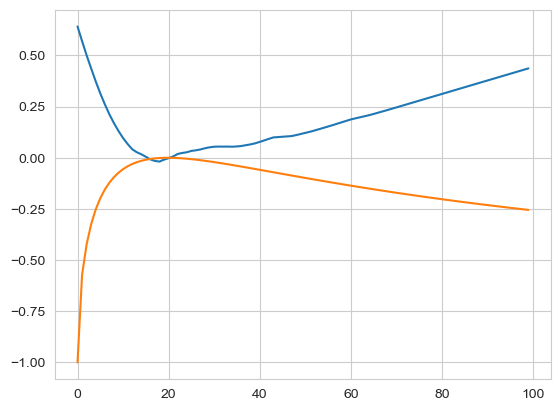

In [9]:
plt.plot(np.matmul(mat_X.transpose(), np.array(w).transpose()))
plt.plot(y)